# Basemap

In this exercise we'll use [Basemap](https://matplotlib.org/basemap/), a matplotlib module used for plotting maps.

NOTE: Basemap module is, in theory, deprecated in favor of [Cartopy](https://scitools.org.uk/cartopy/docs/latest/). However as of today (2021, Oct. 07) cartopy crashes Google Colab. For the sake of better support, we stick to Basemap. Consider that the main concepts are easily adaptable (e.g. you still need to decide what type of projection you want to use).

ASSIGNMENT:

* plot the recorded meteorite positions from the NASA dataset on a Marcator map, subsetting to a maximum of 500 entries (to speed up the process)
* limit the plotted meteorites to a rectangular area of your choice (e.g. all meteorites in Africa). The area is defined by boundaries on maximum and minimum latitude and maximum and minimum longitude
* save the map as a png in the `../results` folder
* redo the same map on a Mollweide projection

For reference you can use [this tutorial](https://medium.com/analytics-vidhya/how-to-plot-data-on-a-world-map-in-python-25cf9733c3dd) or its [related code page](https://github.com/athisha-rk/mediumArticlesRelatedFiles/blob/master/Basemap_Example.ipynb).



# Installing the required packages

You may need to install the following:

In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

     \ 133.1 MB 6.7 MB/s
     |████████████████████████████████| 6.3 MB 6.7 MB/s 
     |████████████████████████████████| 219 kB 55.8 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759607 sha256=99bea8c882aac304298abcde6227c47d31088d8c02a0fa10d8d7bbb2f781f325
  Stored in directory: /tmp/pip-ephem-wheel-cache-lhk_7s7q/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=2257d4773cb9efd7ffe00f6316374bdc8530200170f1bf2a900fa6728879f0e0
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built basemap pyshp


     |████████████████████████████████| 2.8 MB 6.8 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702467 sha256=c50db820d0918afb34b41654e4afe2ee0d6b5e05d002e5e0e944158901964bed
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.2.1
    Uninstalling pyproj-3.2.1:
      Successfully uninstalled pyproj-3.2.1


# Importing everything

Standard imports plus Basemap.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Loading the meteorite data

In [33]:
%run data_manager.py
df = load_meteorites(local_file = 'NASA_meteorite_cleaned.pickle.zip')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,year_as_date
0,Aachen,1,Valid,L5,21.0,Fallen,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)",1880-01-01
1,Aarhus,2,Valid,H6,720.0,Fallen,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",1951-01-01
2,Abee,6,Valid,EH4,107000.0,Fallen,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)",1952-01-01
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fallen,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)",1976-01-01
4,Achiras,370,Valid,L6,780.0,Fallen,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)",1902-01-01


<Figure size 432x288 with 0 Axes>

We define the border of our map via upper and lower limits to longitudes and latitutes. In this way we can subset to interesting areas.

To find the coordinates of your area of choice go to [openstreetmaps](https://www.openstreetmap.org/) and click on Export -> Manually select a different area 

In [35]:
#Remove the comment from the section that you find interesting

#Europe
llat=29.38
ulat=71.41
llon=-29.88
ulon=52.73

#South America
#llat=-58.45
#ulat=19.23
#llon=-121.61
#ulon=-10.55

#World
#llat=-89.9
#ulat=89.9
#llon=-179.9
#ulon=179.9

Subsetting to the interesting part, plus an extra limit to avoid having too many data points (for speed).

In [36]:
df=df[(df['reclong']>llon) & (df['reclong']<ulon) & 
      (df['reclat']>llat) & (df['reclat']<ulat)]

#to avoid overcrowding the map we keep
#a maximum of 500 entries
if (df.shape[0] > 500):
  df = df.iloc[:500, :]

print("Number of final datapoints:",len(df))

Number of final datapoints: 500


# A first Base Map

For this step we just create a simple Mercator projection map ([see doc for reference](https://matplotlib.org/basemap/api/basemap_api.html), but [also this](https://matplotlib.org/basemap/users/merc.html)).

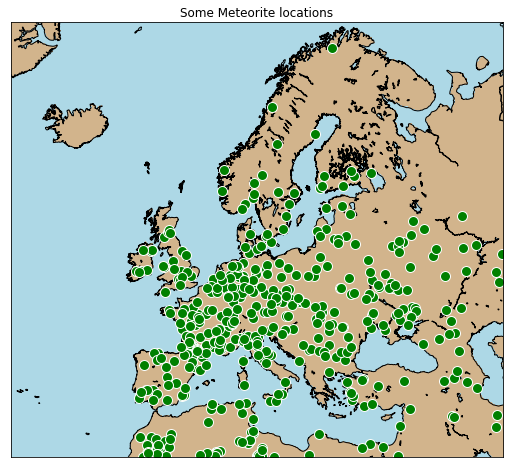

In [44]:
#a new matplotlib figure object, with a slightly 
#bigger size for better visualization
fig = plt.figure(figsize=(12, 8))

#declaring the Basemap object, a Mercatore projection
#with "intermediate" resolution and the limits we
#have used for subsetting the meteorites
my_map=Basemap(projection='merc',
            resolution = 'i',
            llcrnrlon=llon, #llcrnrlon = longitude of lower left hand corner of the selected map domain.
                            # You can figure out the next three parameters
            llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat)

#we want to have coastlines and countries 
#drawn on the map
my_map.drawcoastlines()

#turn this on if you want borders on your map
#my_map.drawcountries()

#defining the base map colors
my_map.drawlsmask(land_color='tan', ocean_color='lightblue')

#converting the coordinates from angle values (longitude and
#latitude) to actual x and y coordinates (this transformation
#depends on the specific map projection)
xs,ys = my_map(np.asarray(df.reclong), np.asarray(df.reclat))
df['x'] = xs.tolist()
df['y'] = ys.tolist()

#adding all the meteorites, one at a time
for index,row in df.iterrows():
  #adding the current meteorite, with some
  #graphical details
  my_map.plot(row.x,row.y,
              markerfacecolor='green',
              markeredgecolor='white',
              marker='o',
              markersize=10)

#adding a global title to the underlying pyplot object
plt.title("Some Meteorite locations")

#exporting the map to an actual image
plt.savefig("meteorite_map.png", dpi=300)

# A better looking map: Mollweide projection

A Mollweide projection shows the entire globe on an ellipse. For that, we are going to use all samples from all geographical areas, just limiting the number of entries to the first 500.

In [50]:
#loading again the meteorite data and subsetting
df = load_meteorites(local_file = 'NASA_meteorite_cleaned.pickle.zip')
df = df.iloc[:500,:]

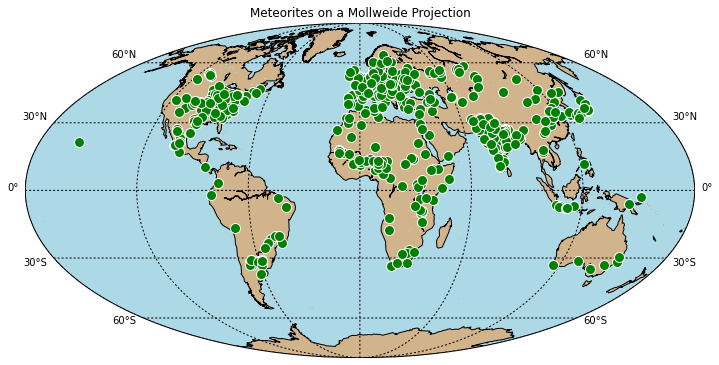

In [51]:
fig = plt.figure(num=None, figsize=(12, 8) )
my_map = Basemap(projection='moll',
            resolution = 'c',
            lon_0=0) #no subsetting, the entire world is always plotted

#main map features
my_map.drawcoastlines()
my_map.drawlsmask(land_color='tan', ocean_color='lightblue')

# draw parallels and meridians.
my_map.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
my_map.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,False],dashes=[2,2])

#converting the coordinates from angle values (longitude and
#latitude) to actual x and y coordinates (this transformation
#depends on the specific map projection)
xs,ys = my_map(np.asarray(df.reclong), np.asarray(df.reclat))
df['x'] = xs.tolist()
df['y'] = ys.tolist()

#adding all the meteorites, one at a time
for index,row in df.iterrows():
  #adding the current meteorite, with some
  #graphical details
  my_map.plot(row.x,row.y,
              markerfacecolor='green',
              markeredgecolor='white',
              marker='o',
              markersize=10)

plt.title("Meteorites on a Mollweide Projection");

# Next steps

Many more tweaking and details can be added to maps. For ideas and inspirations take a look at [this tutorial on basemap](https://rabernat.github.io/research_computing/intro-to-basemap.html).